In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def generate_memories(P, N):
    return np.random.choice([-1, 1], size=(P, N))

In [ ]:
def weight_matrix(memories):
    P, N = memories.shape
    M = np.zeros((N, N))
    for a in range(P):
        M += np.outer(memories[a], memories[a])
    np.fill_diagonal(M, 0) 
    return M / N  


In [4]:
def initialize_state(u_target, q0):
    N = len(u_target)
    s = np.zeros(N)
    for i in range(N):
        if np.random.rand() < q0:
            s[i] = u_target[i]
        else:
            s[i] = np.random.choice([-1, 1])
    return s


In [5]:
def update_state(s, M):
    return np.sign(M @ s)


In [6]:
def compute_overlap(s, u):
    return np.dot(s, u) / len(s)


In [7]:
def run_hopfield(N=100, P=5, q0=0.6, steps=20):
    memories = generate_memories(P, N)
    M = weight_matrix(memories)
    
    u_target = memories[0]
    s = initialize_state(u_target, q0)
    
    qs = [compute_overlap(s, u_target)]
    
    for _ in range(steps):
        s = update_state(s, M)
        qs.append(compute_overlap(s, u_target))
    
    return qs


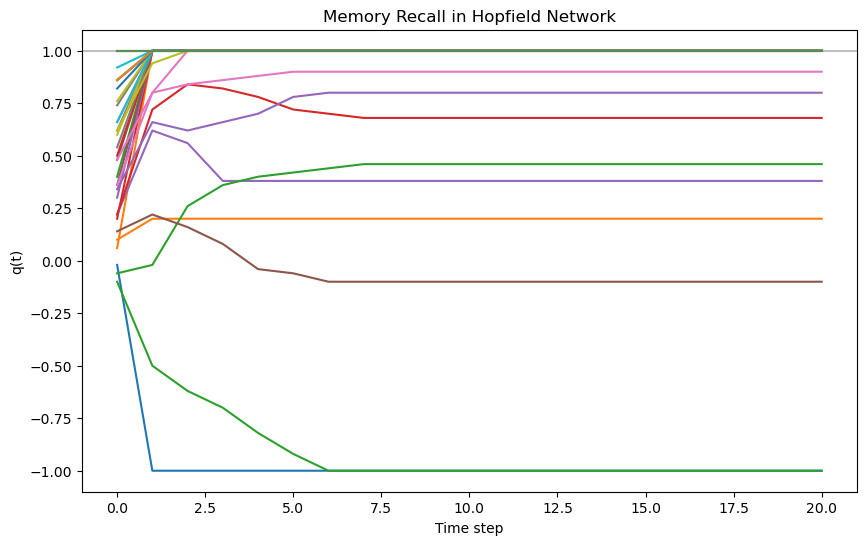

In [10]:
N = 100
P_list = [1, 5, 10]
q0_list = np.linspace(0, 1, 11)

plt.figure(figsize=(10, 6))

for P in P_list:
    for q0 in q0_list:
        qs = run_hopfield(N=N, P=P, q0=q0)
        plt.plot(qs, label=f'P={P}, q0={q0:.1f}')

plt.axhline(y=1.0, color='gray', alpha=0.5)
plt.xlabel("Time step")
plt.ylabel("q(t)")
plt.title("Memory Recall in Hopfield Network")
plt.show()


In [ ]:
def find_critical_P(N=100, q0=1.0, steps=20):
    P = 1
    while True:
        qs = run_hopfield(N=N, P=P, q0=q0, steps=steps)
        if qs[-1] < 0.9:  # memory recovery fails
            return P, qs
        P += 1

find_critical_P(N=100, q0=1.0, steps=20)

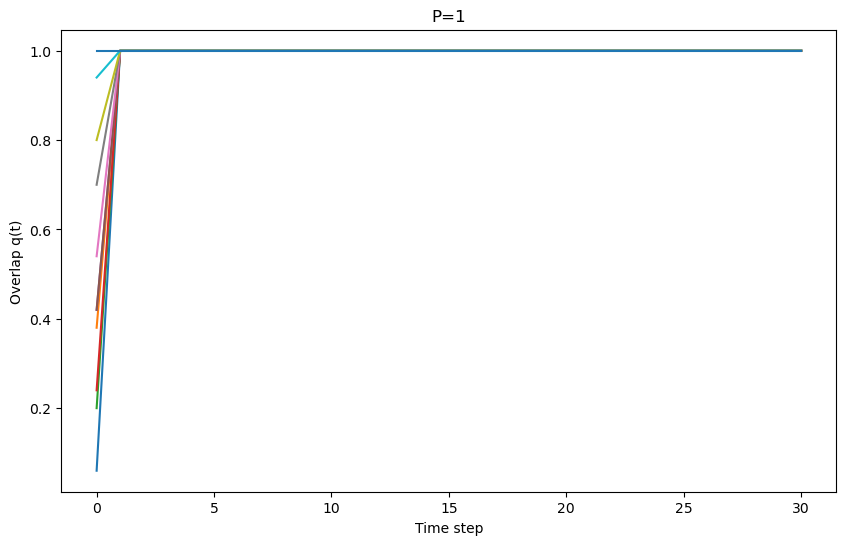

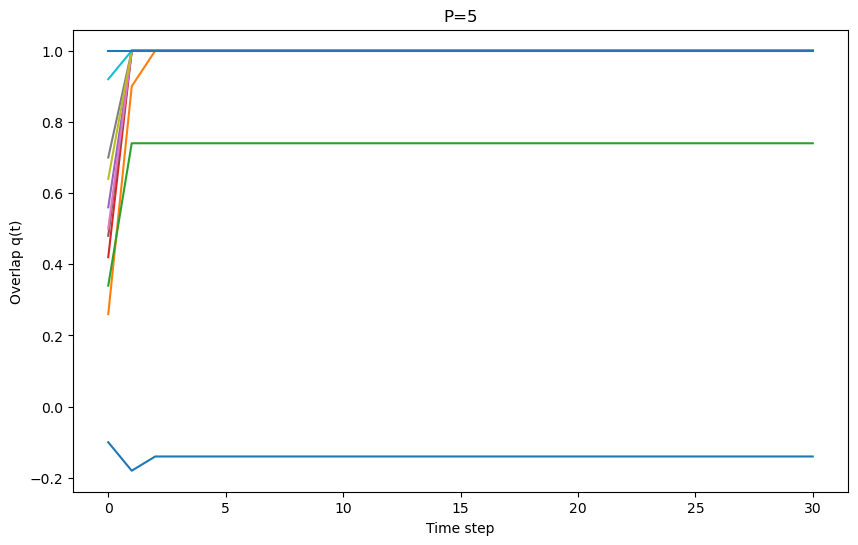

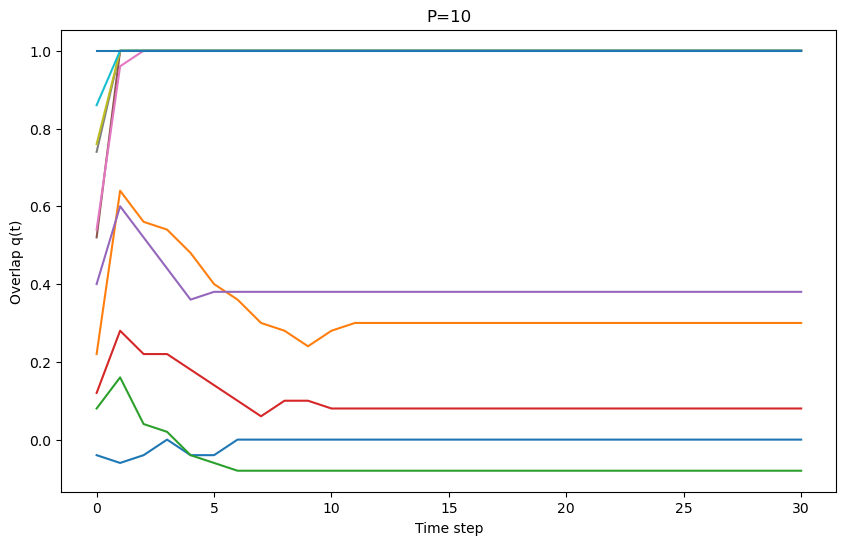

In [14]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
timesteps = 30

def generate_memories(P, N):
    return np.random.choice([-1, 1], size=(P, N))

def construct_weights(memories):
    P, N = memories.shape
    M = np.zeros((N, N))
    for a in range(P):
        M += np.outer(memories[a], memories[a])
    np.fill_diagonal(M, 0)
    return M

def initialize_state(u, q0):
    s = np.zeros_like(u)
    for i in range(len(u)):
        if np.random.rand() < q0:
            s[i] = u[i]
        else:
            s[i] = np.random.choice([-1, 1])
    return s

def update_state(M, s):
    z = M @ s
    return np.where(z >= 0, 1, -1)

def overlap(s, u):
    return np.dot(s, u) / len(s)

# Example for P = 1, 5, 10
for P in [1, 5, 10]:
    memories = generate_memories(P, N)
    M = construct_weights(memories)
    q0_values = np.linspace(0, 1, 11)
    plt.figure(figsize=(10,6))
    for q0 in q0_values:
        s = initialize_state(memories[0], q0)
        qs = [overlap(s, memories[0])]
        for t in range(timesteps):
            s = update_state(M, s)
            qs.append(overlap(s, memories[0]))
        plt.plot(qs, label=f'q0={q0:.1f}')
    plt.title(f'P={P}')
    plt.xlabel('Time step')
    plt.ylabel('Overlap q(t)')
    plt.show()

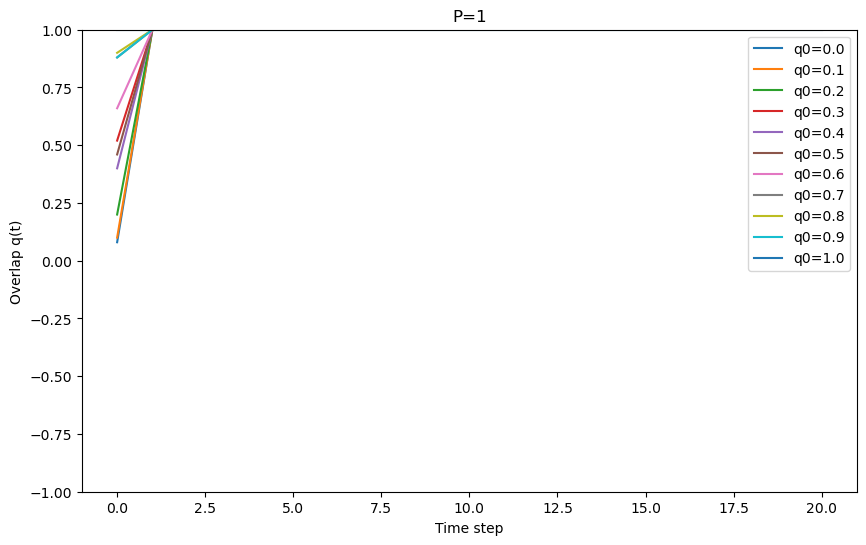

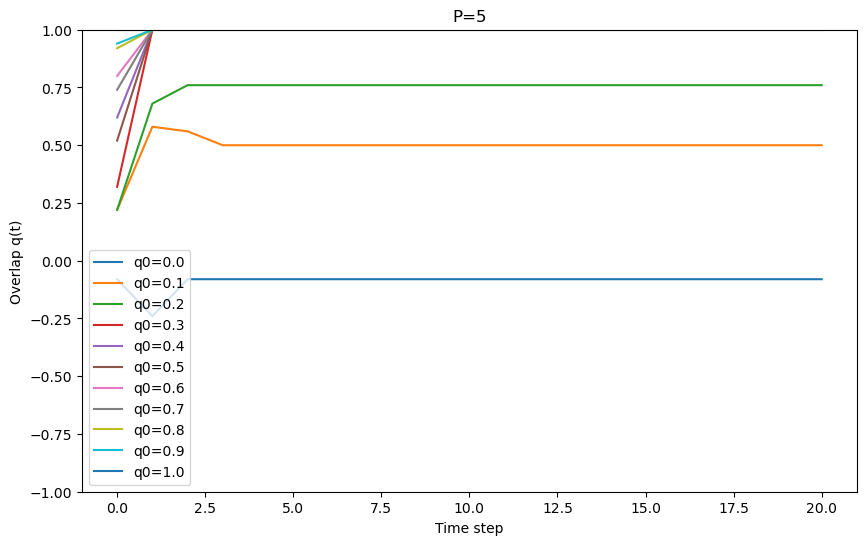

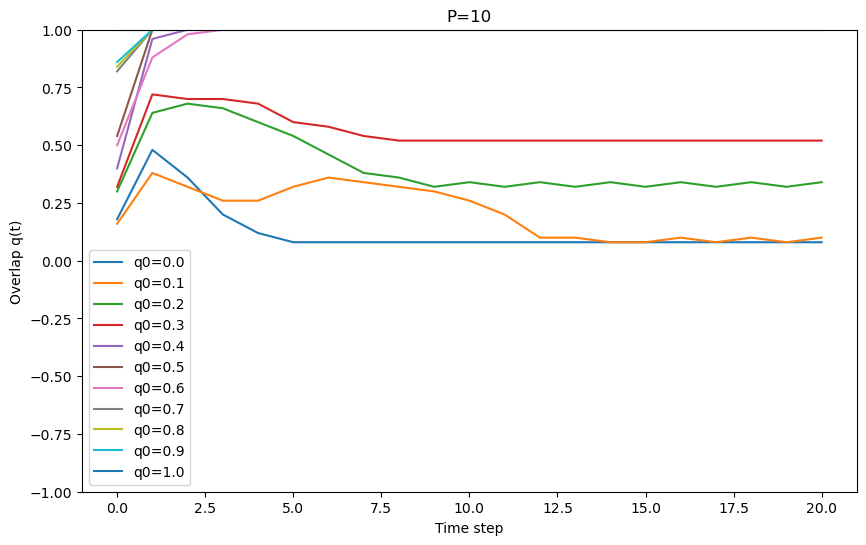

In [25]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
timesteps = 20

def generate_memories(P, N):
    return np.random.choice([-1, 1], size=(P, N))

def construct_weights(memories):
    P, N = memories.shape
    M = np.zeros((N, N))
    for a in range(P):
        M += np.outer(memories[a], memories[a])
    np.fill_diagonal(M, 0)
    return M  # No division by N

def sgn(z):
    # Custom sign function: returns +1 for z >= 0, -1 otherwise
    return np.where(z >= 0, 1, -1)

def initialize_state(u, q0):
    s = np.zeros_like(u)
    for i in range(len(u)):
        if np.random.rand() < q0:
            s[i] = u[i]
        else:
            s[i] = np.random.choice([-1, 1])
    return s

def update_state(M, s):
    z = M @ s
    return sgn(z)

def overlap(s, u):
    return np.dot(s, u) / len(s)

# Part 1a: Plot q(t) for P = 1, 5, 10 and various q0
for P in [1, 5, 10]:
    memories = generate_memories(P, N)
    M = construct_weights(memories)
    q0_values = np.linspace(0, 1, 11)
    plt.figure(figsize=(10,6))
    plt.ylim(-1, 1)
    for q0 in q0_values:
        s = initialize_state(memories[0], q0)
        qs = [overlap(s, memories[0])]
        for t in range(timesteps):
            s = update_state(M, s)
            qs.append(overlap(s, memories[0]))
        plt.plot(qs, label=f'q0={q0:.1f}')
    plt.title(f'P={P}')
    plt.xlabel('Time step')
    plt.ylabel('Overlap q(t)')
    plt.legend()
    plt.show()


/var/folders/pj/c6v4sq5n3pn_r1qk76bj_z3c0000gn/T/ipykernel_64686/1490486682.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('turbo')


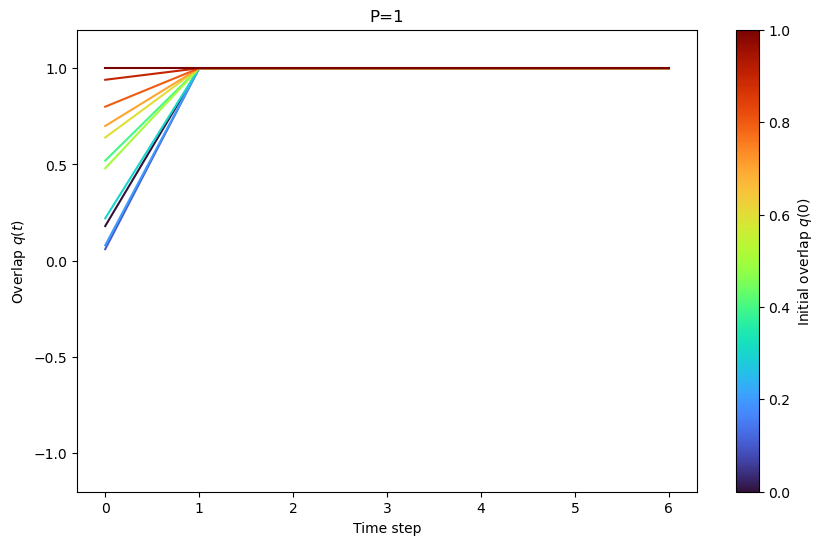

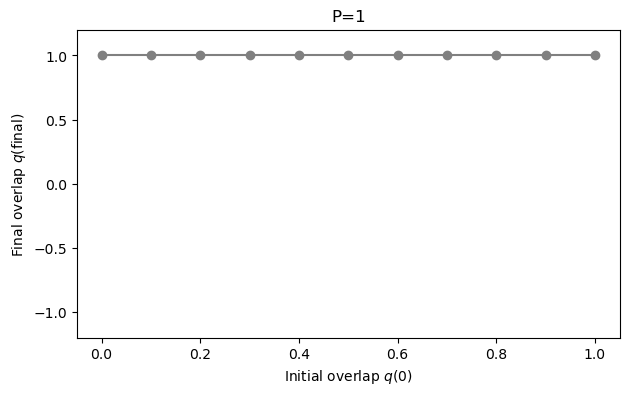

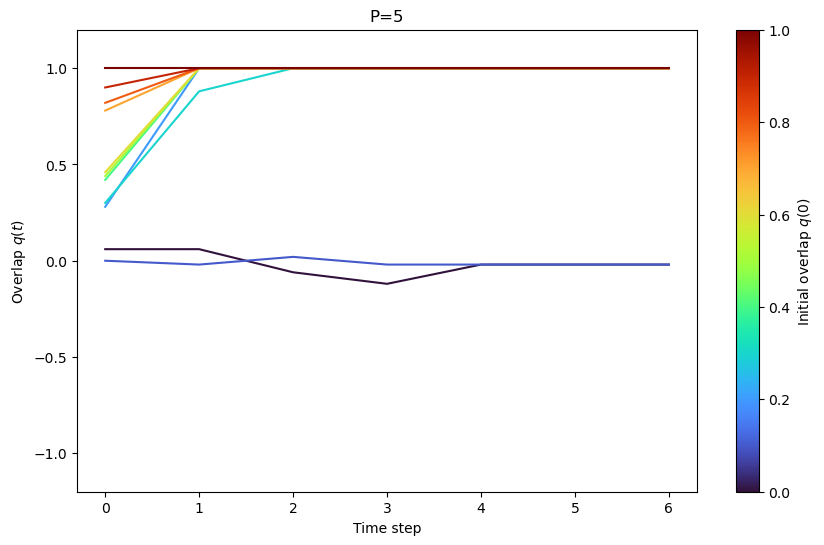

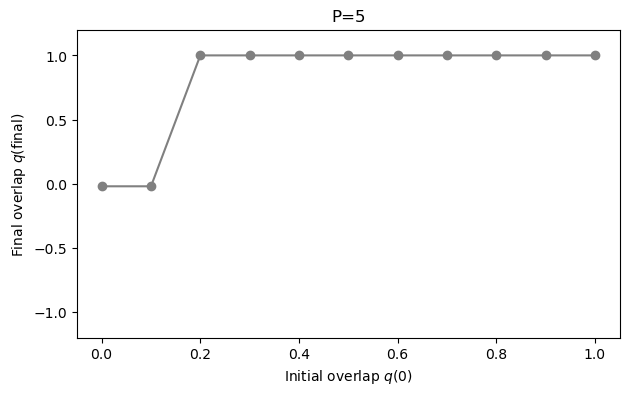

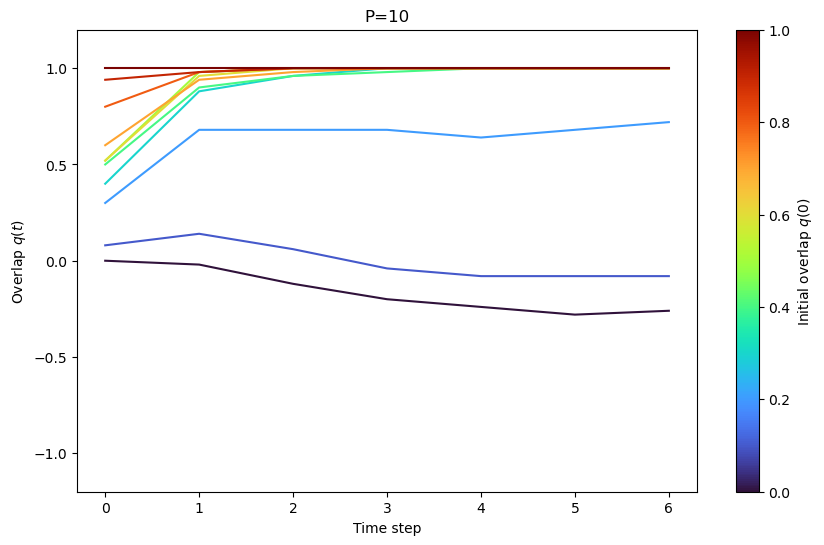

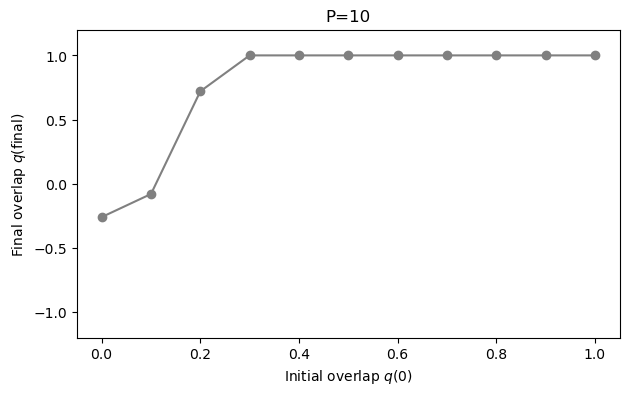

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

N = 100
timesteps = 6
q0_values = np.linspace(0, 1, 11)
P_list = [1, 5, 10]

def generate_memories(P, N):
    return np.random.choice([-1, 1], size=(P, N))

def construct_weights(memories):
    P, N = memories.shape
    M = np.zeros((N, N))
    for a in range(P):
        M += np.outer(memories[a], memories[a])
    np.fill_diagonal(M, 0)
    return M

def sgn(z):
    return np.where(z >= 0, 1, -1)

def initialize_state(u, q0):
    s = np.zeros_like(u)
    for i in range(len(u)):
        if np.random.rand() < q0:
            s[i] = u[i]
        else:
            s[i] = np.random.choice([-1, 1])
    return s

def update_state(M, s):
    z = M @ s
    return sgn(z)

def overlap(s, u):
    return np.dot(s, u) / len(s)

# Improved plot: q(t) for each q0, color-coded, and final q vs q0
for P in P_list:
    memories = generate_memories(P, N)
    M = construct_weights(memories)
    cmap = get_cmap('turbo')
    fig, ax = plt.subplots(figsize=(10,6))
    final_qs = []
    for idx, q0 in enumerate(q0_values):
        color = cmap(idx / (len(q0_values)-1))
        s = initialize_state(memories[0], q0)
        qs = [overlap(s, memories[0])]
        for t in range(timesteps):
            s = update_state(M, s)
            qs.append(overlap(s, memories[0]))
        ax.plot(qs, color=color, label=f'q0={q0:.1f}')
        final_qs.append(qs[-1])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
    plt.colorbar(sm, ax=ax, label='Initial overlap $q(0)$')
    ax.set_title(f'P={P}')
    ax.set_xlabel('Time step')
    ax.set_ylabel('Overlap $q(t)$')
    ax.set_ylim(-1.2, 1.2)
    plt.show()

    # Plot final q vs q0 for this P
    plt.figure(figsize=(7,4))
    plt.plot(q0_values, final_qs, color='gray')
    plt.title(f'P={P}')
    plt.xlabel('Initial overlap $q(0)$')
    plt.ylabel('Final overlap $q$(final)')
    plt.ylim(-1.2, 1.2)
    plt.show()

Critical P where recovery fails for q0=1: 21


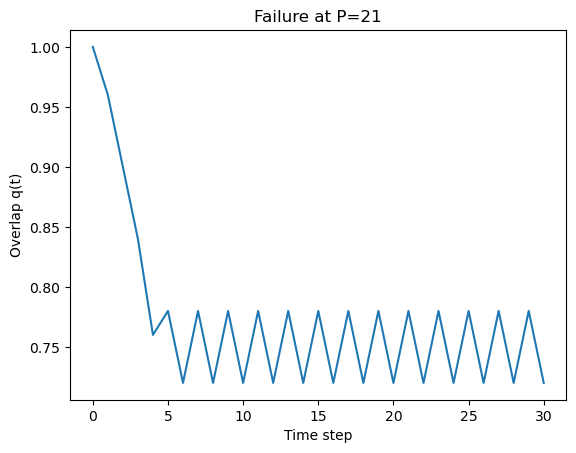

In [16]:
# Part 1b: Find critical P where recovery fails for q0=1
def find_critical_P(N=100, q0=1.0, steps=20, threshold=0.9):
    P = 1
    while True:
        memories = generate_memories(P, N)
        M = construct_weights(memories)
        s = initialize_state(memories[0], q0)
        qs = [overlap(s, memories[0])]
        for _ in range(steps):
            s = update_state(M, s)
            qs.append(overlap(s, memories[0]))
        if qs[-1] < threshold:
            return P, qs
        P += 1

critical_P, qs = find_critical_P(N=100, q0=1.0, steps=30, threshold=0.9)
print(f"Critical P where recovery fails for q0=1: {critical_P}")
plt.plot(qs)
plt.xlabel('Time step')
plt.ylabel('Overlap q(t)')
plt.title(f'Failure at P={critical_P}')
plt.show()